# ANN and the MNIST dataset

Back in the day the **MNIST** dataset was used as a standard benchmark for image classification models. We will use this dataset to evaluate the performance of a Artificial Neural Network (ANN). By the way, this notebook is based on another notebook written by **Professor Benjamín Valdés Aguirre**. And now we import some libraries and modules.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Flatten

Conveniently enough, the MNIST dataset is included in the `tensorflow` library. Let us take advantage of that and import said dataset.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


This dataset contains 60.000 images of handwritten numbers with their labels for training, plus a set of 10.000 images for testing. 

In [3]:
print(f'Number of images in the training set is {X_train.shape[0]}.')
print(f'Number of images in the test set is {X_test.shape[0]}.')

Number of images in the training set is 60000.
Number of images in the test set is 10000.


For learning purposes, it is recommended to scale the values of the pixels of the images, which can be between 0 and 255. Let us do that in the following cell.

In [4]:
X_train = X_train / 255
X_test = X_test / 255

How do these images look like? Let us take a peek by selecting randomly four images from the training set. The following code does this by using the `matplotlib` library for visualization purposes.

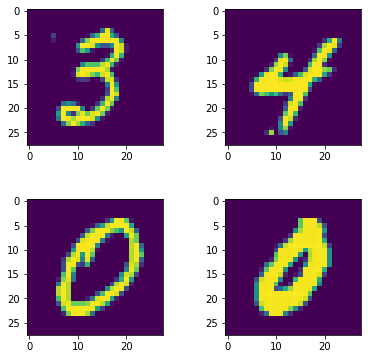

In [5]:
num_train_images = X_train.shape[0]
random_index = np.random.choice(num_train_images, 4)
random_train_images = X_train[random_index]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for n in range(4):
    i, j = divmod(n, 2)
    axes[i, j].imshow(random_train_images[n])
    
plt.show()

Let us build our ANN using the `Sequential` method.

In [6]:
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),                
                    Dense(10, activation='softmax')
                    ])

It is worthwhile to mention that the activation function of the output layer is the **softmax** function, which is used in **multinomial logistig regression**: if you want to know more about this, go to https://en.wikipedia.org/wiki/Softmax_function.

We can get a brief description of our ANN by using the method `summary`. Try to infer how this method computes the number of trainable parameter per layer.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


After telling `tensorflow` how our CNN should be, we need to `compile` the model. In this step we must specify the type of gradient descent method we want to use (`optimizer`), the cost function to be minimized (`loss`), and the metric we want to use to evaluate our model (`metrics`). Notice that since our labels are integers, we must use the **sparse categorical crossentropy** as our cost function.

In [8]:
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

We are ready to train the model using the `fit` method. 

In [9]:
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 812us/step - loss: 0.4180 - accuracy: 0.8812
Epoch 2/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.0969 - accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 1s 780us/step - loss: 0.0662 - accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 1s 778us/step - loss: 0.0486 - accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 2s 832us/step - loss: 0.0370 - accuracy: 0.9885


Notice that the training ran for five epochs and returned the training history, which be used for plotting the learning curves.

In [10]:
df_history = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

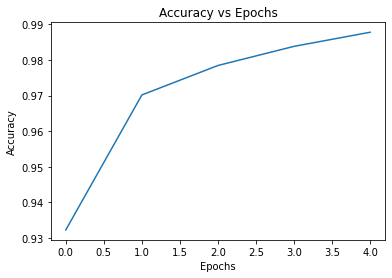

In [11]:
acc_plot = df_history.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

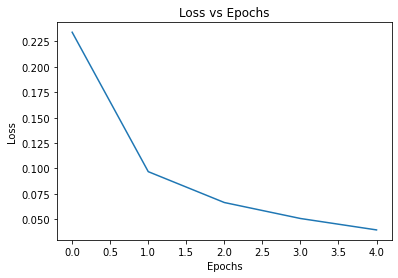

In [12]:
acc_plot = df_history.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

With the `evaluate` method we can see how well our method performs on the test set, which is data that was not included in the training phase.

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 0s 510us/step - loss: 0.0976 - accuracy: 0.9701
Test loss: 0.0975637435913086
Test accuracy: 0.9700999855995178


As you can see, the ANN did pretty well. Let us now see how the trained model does on four handwritten digits that are chosen randomly from the test set.

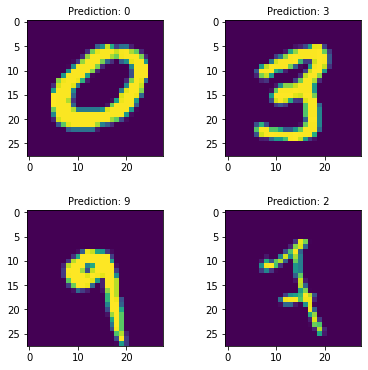

In [14]:
num_test_images = X_test.shape[0]
random_index = np.random.choice(num_test_images, 4)
random_test_images = X_test[random_index]
predictions = model.predict(random_test_images)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for n, prediction in enumerate(predictions):
    i, j = divmod(n, 2)
    axes[i, j].imshow(random_test_images[n])
    axes[i, j].text(8, -1.5, f'Prediction: {np.argmax(prediction)}')
    
plt.show()

## References

[1] https://www.kaggle.com/code/kannannadars/ann-using-mnist-dataset